In [1]:
import numpy as np
from mygame_functions import GameSimulationPolariz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [31]:
N = 127 #511 #1343
#N = 2345
M = 6
T = 10000
pols = GameSimulationPolariz(N,M,T)

# 1. Two ways of extracting the fraction of frozen agents

### ------> 1st

In [32]:
ultimos = abs(pols[:,-1])
len(ultimos[ultimos>35])/len(ultimos)

0.5590551181102362

### ------> 2nd

In [33]:
medias = np.abs(np.mean(pols,axis=1))
len(medias[medias>20])/len(medias)

0.5748031496062992

# 2. Evolution of the differences of scores for individual agents

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.tick_params(which='both',labelbottom=True,labeltop=False,labelleft=True,
                  labelright=False,bottom=True,top=True,left=True,right=False)

ax.set(xlabel='t', ylabel=r'$\Delta_i$')

for i in range(0,N,10):
    ax.plot(np.arange(T),pols[i,:])
ax.axhline(y=0, color='k', linestyle='--')

# 3. Simulations exploring $\alpha$

In [21]:
M = 6
alpha = [10**(-0.9 + 0.06*ni)  for ni in range(30)]  
enes = np.array([int(2**M/alpha[i]) for i in range(len(alpha))])  # N has to be integer
for n in range(len(enes)):
    if enes[n]%2==0:
        enes[n]+=1

In [22]:
alpha = np.array([2**M/enes[i] for i in range(len(alpha))])
enes

array([509, 443, 385, 335, 293, 255, 221, 193, 169, 147, 127, 111,  97,
        85,  73,  65,  55,  49,  43,  37,  33,  27,  25,  21,  19,  17,
        15,  13,  11,   9])

In [23]:
alpha

array([0.12573674, 0.14446953, 0.16623377, 0.19104478, 0.21843003,
       0.25098039, 0.28959276, 0.33160622, 0.37869822, 0.43537415,
       0.50393701, 0.57657658, 0.65979381, 0.75294118, 0.87671233,
       0.98461538, 1.16363636, 1.30612245, 1.48837209, 1.72972973,
       1.93939394, 2.37037037, 2.56      , 3.04761905, 3.36842105,
       3.76470588, 4.26666667, 4.92307692, 5.81818182, 7.11111111])

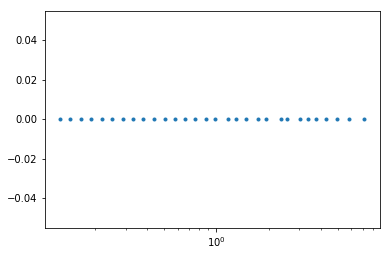

In [34]:
plt.plot(alpha, np.zeros(len(alpha)), '.')
plt.xscale('log')

In [35]:
T = 10000
phi1 = []
phi2 = []
numponderas = 50
imprimecada = 10
for N in enes:
    print('    N = {}    ({}/{})'.format(N,len(phi1)+1,len(enes)))
    print('--> α = {:.4f} <-- \n'.format(alpha[len(phi1)]))
    p1=0
    p2=0
    for i in range(numponderas):
        pols = GameSimulationPolariz(N,M,T)
        
        ultimos = np.abs(pols[:,-1])
        frozen1 = len(ultimos[ultimos>35])/len(ultimos)
        p1+=frozen1
        
        medias = np.abs(np.mean(pols,axis=1))
        frozen2 = len(medias[medias>20])/len(medias)
        p2+=frozen2
        
        if (i+1)%imprimecada == 0:
            print('   Ponderacion nº {} de {}'.format(i+1,numponderas))
            print('      -phi_last = {:.5f}'.format(p1/(i+1)))
            print('      -phi_mean = {:.5f}'.format(p2/(i+1)))
        
    phi1.append(p1/numponderas)
    phi2.append(p2/numponderas)
    
file_name = 'FROZENvsALPHA_6M_10000T_40numponds'
with open('{}.dat'.format(file_name), 'w') as file:
    for i in range(len(alpha)):
        file.write('{} {} {}\n'.format(alpha[i], phi1[i], phi2[i]))

    N = 509    (1/30)
--> α = 0.1257 <-- 

   Ponderacion nº 10 de 50
      -phi_last = 0.00000
      -phi_mean = 0.00000
   Ponderacion nº 20 de 50
      -phi_last = 0.00020
      -phi_mean = 0.00000
   Ponderacion nº 30 de 50
      -phi_last = 0.00013
      -phi_mean = 0.00000
   Ponderacion nº 40 de 50
      -phi_last = 0.00015
      -phi_mean = 0.00005
   Ponderacion nº 50 de 50
      -phi_last = 0.00012
      -phi_mean = 0.00004
    N = 443    (2/30)
--> α = 0.1445 <-- 

   Ponderacion nº 10 de 50
      -phi_last = 0.00000
      -phi_mean = 0.00000
   Ponderacion nº 20 de 50
      -phi_last = 0.00011
      -phi_mean = 0.00000
   Ponderacion nº 30 de 50
      -phi_last = 0.00008
      -phi_mean = 0.00008
   Ponderacion nº 40 de 50
      -phi_last = 0.00006
      -phi_mean = 0.00011
   Ponderacion nº 50 de 50
      -phi_last = 0.00005
      -phi_mean = 0.00009
    N = 385    (3/30)
--> α = 0.1662 <-- 

   Ponderacion nº 10 de 50
      -phi_last = 0.00000
      -phi_mean = 0.00104
  

   Ponderacion nº 50 de 50
      -phi_last = 0.40186
      -phi_mean = 0.41907
    N = 37    (20/30)
--> α = 1.7297 <-- 

   Ponderacion nº 10 de 50
      -phi_last = 0.40000
      -phi_mean = 0.41351
   Ponderacion nº 20 de 50
      -phi_last = 0.36351
      -phi_mean = 0.39189
   Ponderacion nº 30 de 50
      -phi_last = 0.36757
      -phi_mean = 0.40000
   Ponderacion nº 40 de 50
      -phi_last = 0.36216
      -phi_mean = 0.39662
   Ponderacion nº 50 de 50
      -phi_last = 0.35622
      -phi_mean = 0.39027
    N = 33    (21/30)
--> α = 1.9394 <-- 

   Ponderacion nº 10 de 50
      -phi_last = 0.30000
      -phi_mean = 0.32424
   Ponderacion nº 20 de 50
      -phi_last = 0.31515
      -phi_mean = 0.35000
   Ponderacion nº 30 de 50
      -phi_last = 0.30707
      -phi_mean = 0.34141
   Ponderacion nº 40 de 50
      -phi_last = 0.31894
      -phi_mean = 0.34848
   Ponderacion nº 50 de 50
      -phi_last = 0.31758
      -phi_mean = 0.34788
    N = 27    (22/30)
--> α = 2.3704 <-- 

  

In [ ]:
phi = np.add(phi1,phi2)/2

In [ ]:
file_name = 'FROZENvsALPHA_8M_10000T_40numponds'
with open('{}.dat'.format(file_name), 'w') as file:
    for i in range(len(alpha)):
        file.write('{} {}\n'.format(alpha[i], phi[i]))

## Leo los guardados

In [2]:
alpha6 = []
phi61 = []
phi62 = []
file_name = 'FROZENvsALPHA_6M_10000T_40numponds'
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[2].split('\n')
        alpha6.append(float(value[0]))
        phi61.append(float(value[1]))
        phi62.append(float(value[2]))

In [3]:
alpha7 = []
phi7 = []
file_name = 'FROZENvsALPHA_7M_10000T_50numponds'
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[1].split('\n')
        alpha7.append(float(value[0]))
        phi7.append(float(value[1]))

In [4]:
alpha8 = []
phi8 = []
file_name = 'FROZENvsALPHA_8M_10000T_40numponds'
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[1].split('\n')
        alpha8.append(float(value[0]))
        phi8.append(float(value[1]))

# Figure

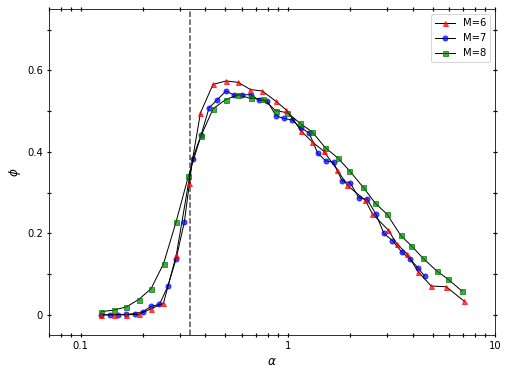

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

ax.tick_params(which='both',direction='inout', length=4, width = 1.2,
        labelbottom=True,labeltop=False,labelleft=True,
        labelright=False,bottom=True,top=True,left=True,right=True)

ax.set(xscale='log', xlim = [0.07,10], ylim=[-0.05,0.75])
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: ('{{:.{:1d}f}}'.format(
        int(np.maximum(-np.log10(x), 0)))).format(x)))

ax.set_xlabel(xlabel = r'$\alpha$', fontsize = 'large')
ax.set_ylabel(ylabel = r'$\phi$', fontsize='large')

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax.set_yticklabels(['0', None, '0.2', None, '0.4', None, '0.6', None])

lin7, = ax.plot(alpha7, phi7, lw=1, ls = '-', color = 'k')
mark7, = ax.plot(alpha7, phi7, ls = ' ', marker='o', ms = 5, alpha=.7, mec='b', mfc='b')

lin8, = ax.plot(alpha8, phi8, lw=1, ls = '-', color = 'k')
mark8, = ax.plot(alpha8, phi8, ls = ' ', marker='s', ms = 5, alpha=.7, mec='g', mfc='g')


lin6, = ax.plot(alpha6, phi61, lw=1, ls = '-', color = 'k')
mark6, = ax.plot(alpha6, phi61, ls = ' ', marker='^', ms = 5, alpha=.7, mec='r', mfc='r')

ax.axvline(x=0.337, color='k', linestyle='--', alpha = 0.7)

ax.legend([(lin6, mark6), (lin7, mark7), (lin8, mark8)], ['M=6', 'M=7', 'M=8'], loc=0)

filename = 'frozen_vs_alpha_6,7,8M_10000T_50ponds.png'
fig.savefig(filename, bbox_inches='tight')